In [146]:
#using DataFrames
using Random, Distributions, Statistics, Plots, DifferentialEquations, LinearAlgebra, Plots

### Discrete time

From chapter 14 of Statistics of stochastic processes by Liptser and Schishiryaev.

#### Problem specification

Suppose we have the following system of reccurence equations for process $(\theta, \xi)$:
\begin{align*}
    \forall t=0,\ldots,T:\theta(t+1)&=b(t)\varepsilon_{1}(t+1)+a(t)\theta(t)+c(t)u(t),\quad &\theta(0)\sim\mathcal{N}_{k}(m(0), \gamma(0))\\
    \forall t=0,\ldots,T:\xi(t+1)   &=B(t)\varepsilon_{2}(t+1)+A(t)\theta(t),\quad &\xi(0)\equiv0
\end{align*}
where $\varepsilon_{1}(t), \varepsilon_{2}(t)$ all have standard multivariate normal distribution and are independent, and matrix valued functions $A, B, a, b, c$ are deterministic. We're only able to observe $\xi$ and can control the process $u(t)$, that is choose $u$ based on observed values of $\xi$ up to the time point $t$ in other words the process $u$ is adapted to the filtration generated by $\xi$, in a way that minimizes the following equadratic loss functional:
\begin{equation}
    V(u)=\mathbb{E}\left[\sum_{t=0}^{T-1}\left(\theta(t)^{T}H(t)\theta(t)+u(t)^{T}R(t)u(t)\right)+\theta(T)^{T}H(T)\theta(T)\right],
\end{equation}
where $H, R$ are deterministic non-negative define and elementwise bounded. We also require that:
\begin{equation*}
    \forall t=0,\ldots,T:\mathbb{E}\left[\lVert u(t)\rVert_{2}^{2}\right]<\infty.
\end{equation*}
The vectors and matrixes in problem specifications take values in the following spacers:
\begin{equation*}
    \forall t=0,\ldots,T:u(t)\in\mathbb{R}^{r},\theta(t),\varepsilon_{1}(t)\in\mathbb{R}^{k},\xi(t),\varepsilon_{2}(t)\in\mathbb{R}^{l},
    c(t)\in\mathbb{R}^{k\times r},a(t)\in\mathbb{R}^{k\times k},b(t)\in\mathbb{R}^{k\times k},A(t)\in\mathbb{R}^{l\times k},B(t)\in\mathbb{R}^{l\times l}.
\end{equation*}

#### Analytic solution

The best process $\overset{\sim}{u}$ for quadractic functional $V$ is:
\begin{equation*}
    \overset{\sim}{u}(t)=-\left(R(t)+c(t)^{T}P(t+1)c(t)\right)^{+}c(t)^{T}P(t+1)\overset{\sim}{m}(t)
\end{equation*}
where $(\cdot)^{+}$ denotes Moore-Penrose generalized inverse and:
\begin{align*}
    P(t)&=H(t)+a(t)^{T}P(t+1)a(t)-a(t)^{T}P(t+1)c(t)\left(R(t)+c(t)^{T}P(t+1)c(t)\right)^{+}c(t)^{T}P(t+1)a(t), P(T)=H(T)\\
    \gamma(t+1)&= a(t)\gamma(t)a(t)^{T}+b(t)b(t)^{T}-a(t)\gamma(t)A(t)^{T}
    \left(B(t)B(t)^{T}+A(t)\gamma(t)A(t)^{T}\right)^{+}A(t)\gamma(t)a(t)^{T}\\
    D(t)&=a(t)\gamma(t)A(t)^{T}\left(\sqrt{B(t)B(t)^{T}+A(t)\gamma(t)A(t)^{T}}\right)^{+}\\
    p(t)&=\sum_{s=t}^{T-1}\text{tr}\left(\sqrt{P(s+1)}D(s)D(s)^{T}\sqrt{P(s+1)}\right), p(T)=0\\
    \overset{\sim}{m}(t+1)&=c(t)\overset{\sim}{u}(t)+a(t)\overset{\sim}{m}(t)+a(t)\gamma(t)A(t)^{T}
    \left(B(t)B(t)^{T}+A(t)\gamma(t)A(t)^{T}\right)^{+}\left(\xi(t+1)-A(t)\overset{\sim}{m}(t)\right)
\end{align*}
and the corresponding value of $V(\overset{\sim}{u})$ is given by:
\begin{equation*}
    V(\overset{\sim}{u})=p(0)+m(0)^{T}P(0)m(0)+\sum_{t=0}^{T}\text{tr}\left(\sqrt{H(t)}\gamma(t)\sqrt{H(t)}\right).
\end{equation*}

#### Ilustation

Let's simulate this process with $k=l, r=2$ for simplicity and with $\gamma(0)=I_{k}, m(0)=0$ and with:
\begin{align*}
    a(t)&=\begin{pmatrix}
        \sin(2\pi t) & \sin(2\pi t + \pi / 4) & \sin(2\pi t + 2\pi / 4) & \sin(2\pi t + 3\pi / 4) & \sin(2\pi t + \pi)\\
        \cos(2\pi t) & \cos(2\pi t + \pi / 4) & \cos(2\pi t + 2\pi / 4) & \cos(2\pi t + 3\pi / 4) & \cos(2\pi t + \pi)\\
        \sin(2\pi t) & \sin(2\pi t + \pi / 4) & \sin(2\pi t + 2\pi / 4) & \sin(2\pi t + 3\pi / 4) & \sin(2\pi t + \pi)\\
        \cos(2\pi t) & \cos(2\pi t + \pi / 4) & \cos(2\pi t + 2\pi / 4) & \cos(2\pi t + 3\pi / 4) & \cos(2\pi t + \pi)\\
        \sin(2\pi t) & \sin(2\pi t + \pi / 4) & \sin(2\pi t + 2\pi / 4) & \sin(2\pi t + 3\pi / 4) & \sin(2\pi t + \pi)
    \end{pmatrix}\\
    b(t)&=\begin{pmatrix}
        t / T & (t / T)^{2} & (t / T)^{3} & (t / T)^{4} & (t / T)^{5}\\
        (t / T)^{2} & t / T & (t / T)^{3} & (t / T)^{4} & (t / T)^{5}\\
        (t / T)^{2} & (t / T)^{3} & t / T & (t / T)^{4} & (t / T)^{5}\\
        (t / T)^{2} & (t / T)^{3} & (t / T)^{4} & t / T & (t / T)^{5}\\
        (t / T)^{2} & (t / T)^{3} & (t / T)^{4} & (t / T)^{5} & t / T
    \end{pmatrix}
    c(t)=\begin{pmatrix}
        t & t / 2\\
        t^{2} & t^{2} / 2\\
        t^{3} & t^{3} / 2\\
        t^{4} & t^{4} / 2\\
        t^{5} & t^{5} / 2
    \end{pmatrix}\\
    A(t)&=\begin{pmatrix}
        \frac{1+t}{t+T} & \frac{t}{t+T}   & \frac{t}{t+T}   & \frac{t}{t+T}   & \frac{t}{t+T}\\
        \frac{t}{t+T}   & \frac{2+t}{t+T} & \frac{t}{t+T}   & \frac{t}{t+T}   & \frac{t}{t+T}\\
        \frac{t}{t+T}   & \frac{t}{t+T}   & \frac{3+t}{t+T} & \frac{t}{t+T}   & \frac{t}{t+T}\\
        \frac{t}{t+T}   & \frac{t}{t+T}   & \frac{t}{t+T}   & \frac{4+t}{t+T} & \frac{t}{t+T}\\
        \frac{t}{t+T}   & \frac{t}{t+T}   & \frac{t}{t+T}   & \frac{t}{t+T}   & \frac{5+t}{t+T} 
    \end{pmatrix},
    B(t)=(t / T)I
\end{align*}

Set up and hyperparametrs:

In [191]:
T = 20 # time horizon
k = 5  # dimention
r = 2  # control dimension
m = [zeros(k)]
γ = [Matrix{Float64}(I, k, k)]

#H_mat = [rand(k, k) for t in 0:T]
#H_mat = [H_mat[t + 1]' + H_mat[t + 1] + 2 * I for t in 0:T]

#R_mat = [rand(Uniform(0, .5), r, r) for t in 0:T]
#R_mat = [R_mat[t + 1]' + R_mat[t + 1] + 2 * I for t in 0:T]
H_mat = [Diagonal(rand(k)) for t in 0:T]
R_mat = [Diagonal(rand(r)) for t in 0:T]

H(t) = H_mat[t]
R(t) = R_mat[t]

function a(t)
    [
        sin(2 * π * t) sin(2 * π * t + π / 4) sin(2 * π * t + 2 * π / 4) sin(2 * π * t + 3 * π / 4) sin(2 * π * t + π)
        cos(2 * π * t) cos(2 * π * t + π / 4) cos(2 * π * t + 2 * π / 4) cos(2 * π * t + 3 * π / 4) cos(2 * π * t + π)
        sin(2 * π * t) sin(2 * π * t + π / 4) sin(2 * π * t + 2 * π / 4) sin(2 * π * t + 3 * π / 4) sin(2 * π * t + π)
        cos(2 * π * t) cos(2 * π * t + π / 4) cos(2 * π * t + 2 * π / 4) cos(2 * π * t + 3 * π / 4) cos(2 * π * t + π)
        sin(2 * π * t) sin(2 * π * t + π / 4) sin(2 * π * t + 2 * π / 4) sin(2 * π * t + 3 * π / 4) sin(2 * π * t + π)
    ]
end # end function

function b(t)
    [
        (t / T) (t / T) ^ 2 (t / T) ^ 3 (t / T) ^ 4 (t / T) ^ 5
        (t / T) ^ 2 (t / T) (t / T) ^ 3 (t / T) ^ 4 (t / T) ^ 5
        (t / T) ^ 2 (t / T) ^ 3 (t / T) (t / T) ^ 4 (t / T) ^ 5
        (t / T) ^ 2 (t / T) ^ 3 (t / T) ^ 4 (t / T) (t / T) ^ 5
        (t / T) ^ 2 (t / T) ^ 3 (t / T) ^ 4 (t / T) ^ 5 (t / T)
    ]
end # end function

function c(t)
    [
        t     t / 2
        t ^ 2 t ^ 2 / 2
        t ^ 3 t ^ 3 / 2
        t ^ 4 t ^ 4 / 2
        t ^ 5 t ^ 5 / 2
    ]
end # end function

function A(t)
    res = zeros(k, k)
    res .= t / (T + t)
    res[diagind(res)] .= [(u + t) / (T + t) for u in 1:k]

    res
end # end function

function B(t)
    (t / T) * Matrix{Float64}(I, k, k)
end # end function

B (generic function with 1 method)

Computing Deterministic matrix valued functions $\gamma, P, p, D$

In [192]:
# for now inverted indixes in P and p
P = Vector{Any}(undef, T + 1)
p = Vector{Real}(undef, T + 1)
p[T + 1] = 0.0
P[T + 1] = H(T)
D = [a(0) * γ[1] * A(0)' * pinv(Matrix(cholesky(Hermitian(B(0) * B(0)' + A(0) * γ[1] * A(0)'))))]

for t in 0:(T-1)
    push!(γ, a(t) * γ[end] * a(t)' + b(t) * b(t)' - a(t) * γ[end] * A(t)' * pinv(B(t) * B(t)' + A(t) * γ[end] * A(t)') * A(t) * γ[end] * a(t)')
    push!(D, a(t + 1) * γ[end] * A(t + 1)' * pinv(Matrix(cholesky(Hermitian(B(t + 1) * B(t + 1)' + A(t + 1) * γ[end] * A(t + 1)')))))
    P[T - t] = H(T - t) + a(T - t - 1)' * P[T - t + 1] * a(T - t - 1) - a(T - t - 1)' * P[T - t + 1] * (c(T - t - 1) * pinv(R(T - t) + 
               c(T - t - 1)' * P[T - t + 1] * c(T - t - 1)) * c(T - t - 1)') * P[T - t + 1] * a(T - t - 1)
end # end for t

In [193]:
for t in 0:(T-1)
    p[T - t] = p[T - t + 1] + tr(Matrix(cholesky(Hermitian(P[T - t + 1]))) * D[T - t] * D[T - t]' * Matrix(cholesky(Hermitian(P[T - t + 1]))))
end # end for t

Simulating $(\theta, \xi)$

In [194]:
ξ = [zeros(k)]
θ = [rand(MvNormal(m[1], γ[1]))]
u = []

for t in 0:19
    push!(u, -pinv(R(t + 1) + c(t)' * P[t + 2] * c(t)) * c(t)' * P[t + 2] * m[end])
    push!(ξ, A(t) * θ[end] + B(t) * rand(Normal(), 5))
    push!(θ, a(t) * θ[end] + c(t) * u[end] + b(t) * rand(Normal(), 5))
    push!(m, c(t) * u[end] + a(t) * m[end] + a(t) * γ[t + 1] * A(t)' * pinv(B(t) * B(t)' + A(t) * γ[t + 1] * A(t)') * (ξ[end] - A(t) * m[end]))
end # end for t

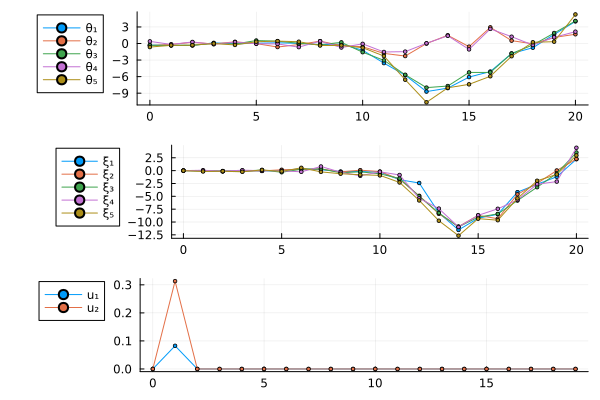

In [197]:
plot(
    plot(0:T, reduce(hcat, θ)', labels = ["θ₁" "θ₂" "θ₃" "θ₄" "θ₅"], legend = :outertopleft, marker=(:circle, 2)),
    plot(0:T, reduce(hcat, ξ)', labels = ["ξ₁" "ξ₂" "ξ₃" "ξ₄" "ξ₅"], legend = :outertopleft, marker=(:circle, 2)),
    plot(0:(T-1), reduce(hcat, u)', labels = ["u₁" "u₂"], legend = :outertopleft, marker=(:circle, 2)),
    layout = [1, 1, 1]
)

### Continous time